# Q1) Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
# R&D Spend -- Research and devolop spend in the past few years
# Administration -- spend on administration in the past few years
# Marketing Spend -- spend on Marketing in the past few years
# State -- states from which data is collected
# Profit -- profit of each state in the past few years

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [12]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


## Visualization and correlation analysis

In [14]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [16]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [17]:
df.corr()

<ipython-input-17-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


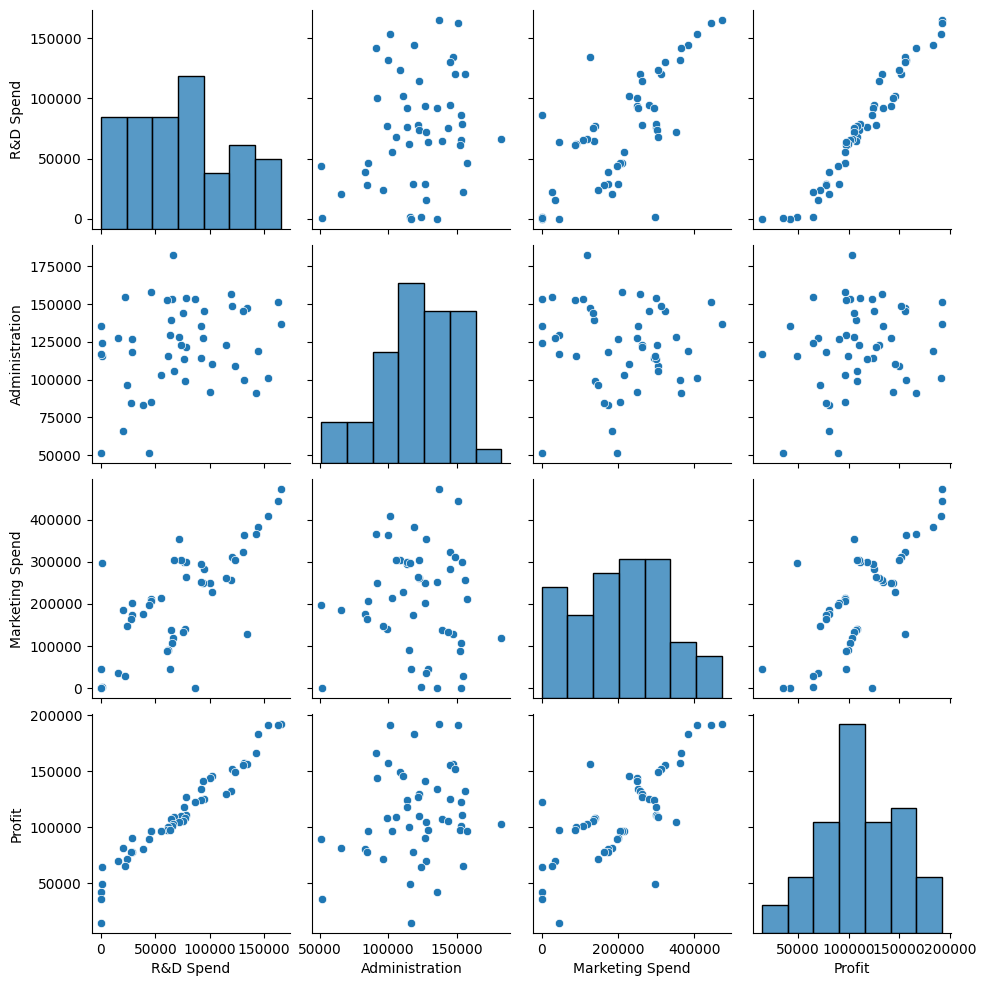

In [18]:
sns.pairplot(df)

<ipython-input-19-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


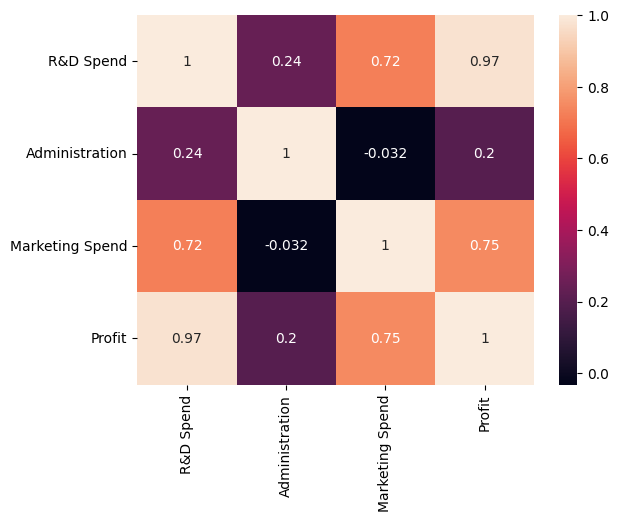

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# EDA

In [20]:
df=df.drop('State',axis=1)

In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [22]:
# Renaming the columns
df=df.rename({'R&D Spend':'rds','Administration':'adm','Marketing Spend':'ms','Profit':'pft'},axis=1)
df.head()

,rds,adm,ms,pft
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [23]:
df.shape

(50, 4)

In [24]:
df[df.duplicated()]

,rds,adm,ms,pft


# Preparing a model

In [25]:
model = smf.ols('pft~rds+adm+ms',data=df).fit()

In [26]:
model.params

Intercept    50122.192990
rds              0.805715
adm             -0.026816
ms               0.027228
dtype: float64

In [27]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
rds          17.846374
adm          -0.525507
ms            1.655077
dtype: float64 
 Intercept    1.057379e-09
rds          2.634968e-22
adm          6.017551e-01
ms           1.047168e-01
dtype: float64


In [28]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [29]:
# or simply e can do summery
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pft   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        16:40:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds            0.8057      0.045     17.846      0.000       0.715       0.897
adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
ms             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple Linear Regression Models

In [30]:
# here p value should be less than 0.05
# from above model we can see p values of Admistration and Marketing_Spend are high
# so we need to find the impecting variable


In [31]:
ml_a=smf.ols('pft~adm',data = df).fit()
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)

Intercept    3.040044
adm          1.419493
dtype: float64 
 Intercept    0.003824
adm          0.162217
dtype: float64


In [32]:
ml_m=smf.ols('pft~ms',data = df).fit()
#t and p-Values
print(ml_m.tvalues, '\n', ml_m.pvalues)

Intercept    7.808356
ms           7.802657
dtype: float64 
 Intercept    4.294735e-10
ms           4.381073e-10
dtype: float64


In [33]:
# here we can see that the Admistration data is impecting one


In [34]:
rsq_rds=smf.ols('rds~adm+ms',data=df).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adm=smf.ols('adm~ms+rds',data=df).fit().rsquared
vif_adm=1/(1-rsq_adm)

rsq_ms=smf.ols('ms~rds+adm',data=df).fit().rsquared
vif_ms=1/(1-rsq_ms)

d1 = {'Variables':['rds','adm','ms'],'VIF':[vif_rds,vif_adm,vif_ms],'Rsq':[rsq_rds,rsq_adm,rsq_ms]}
frame=pd.DataFrame(d1)
frame

,Variables,VIF,Rsq
0,rds,2.468903,0.594962
1,adm,1.175091,0.149002
2,ms,2.326773,0.570220


# Subset selection

In [35]:
# AIC : Akaike Information Criterion
# used to find the best model, lower the AIC better the model

In [36]:
# here Administration is the effective one because its p value is greater than 0.05


In [37]:
# with adm , by dropping ms
model = smf.ols('pft~adm+rds',data=df).fit()
f'AIC:{model.aic}, rsq_adm:{rsq_adm}'

'AIC:1059.6636934567293, rsq_adm:0.1490020823951752'

In [38]:
# with ms without adm
model = smf.ols('pft~ms+rds',data=df).fit()
f'AIC:{model.aic}, rsq_ms:{rsq_ms}'

'AIC:1057.070772191826, rsq_ms:0.5702202685282504'

In [39]:
# first or we can say basic model
model = smf.ols('pft~adm+ms+rds',data=df).fit()
rsq=model.rsquared
f'AIC:{model.aic}, rsq:{rsq}'

'AIC:1058.7714985998052, rsq:0.9507459940683246'

# here we can see that as removing either one of them is effecting the r squared value
# so we can say the both are not removable

# Residual Analysis


In [40]:
# Residuals= actual values - predicted values
# residual analysis gives the values of residuals

In [41]:
# Q-Q plot: Quantile Quantile plot
# it plots the residuals and gives the non linearity of the data points
# which help us to visualize residuals

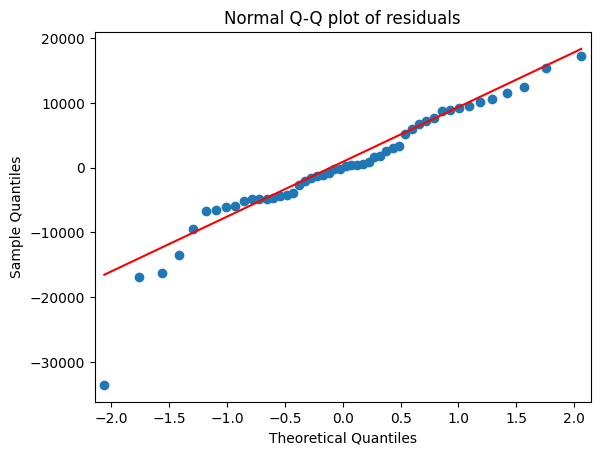

In [42]:
import statsmodels.api as sm

model=smf.ols('pft~rds+adm+ms',data=df).fit()
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [43]:
list(np.where(model.resid<-30000))

[array([49])]

# inference
The output [array([49], dtype=int64)] indicates that the only index where the residual is less than -30000 is index 49.

This suggests that observation 49 in the dataset has a significant negative residual, indicating that the predicted value for this observation is considerably lower than the actual value.

# Residual plot for Homoscedasticity

In [44]:
# homoscedasticity means that the variability of the response variable is similar across different values of the predictor variables.
# means variance of the errors or residuals of the model is constant across all levels.

In [45]:
model=smf.ols('pft~rds+adm+ms',data=df).fit()

In [46]:
# defining the function
def get_standardized_values( vals ):
    return (vals-vals.mean())/vals.std()

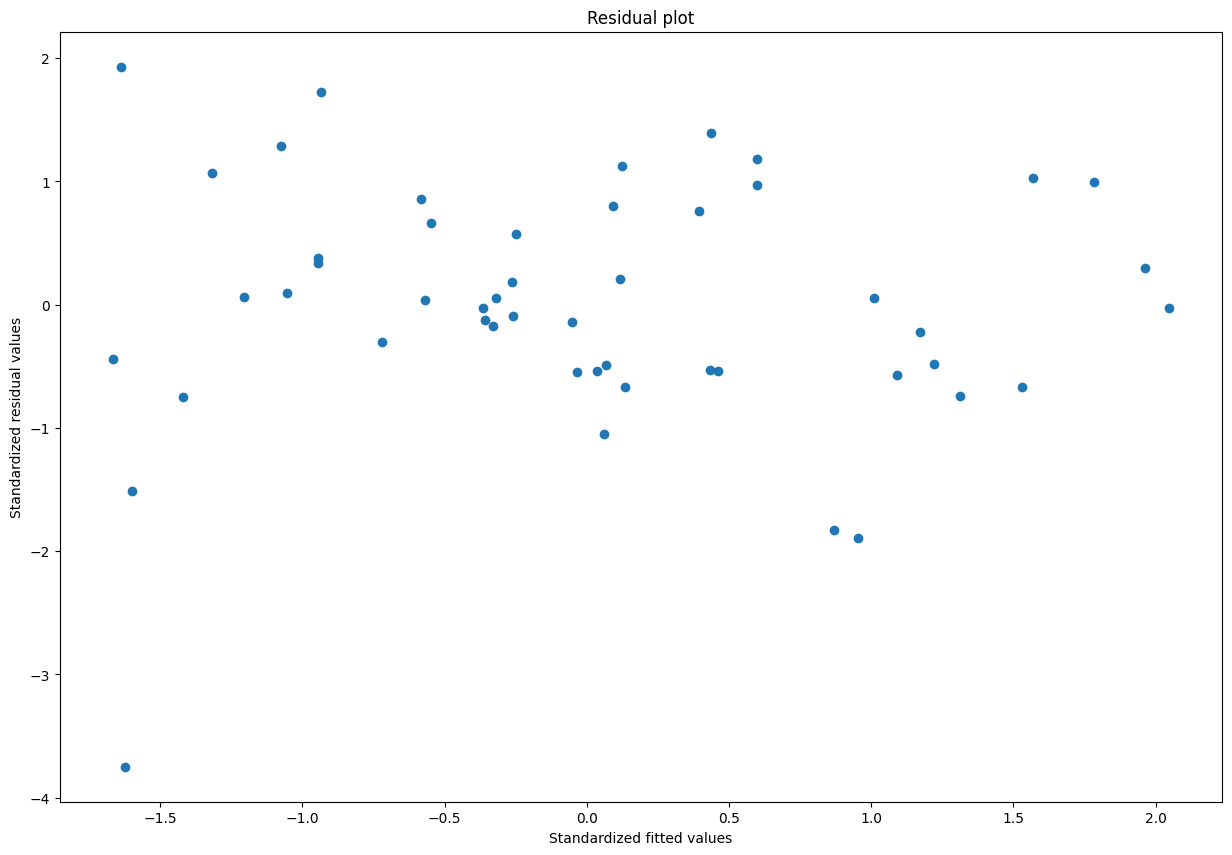

In [47]:
# plot between fitted values and residual values
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [48]:
# here not any pattern in residual plot so there is a good chance of model is linearly fitted

# Residual vs Regressors

In [49]:
# used to see residual values with each indipendent varible as there is any pattern or not
# if there is any pattern then model is not linear

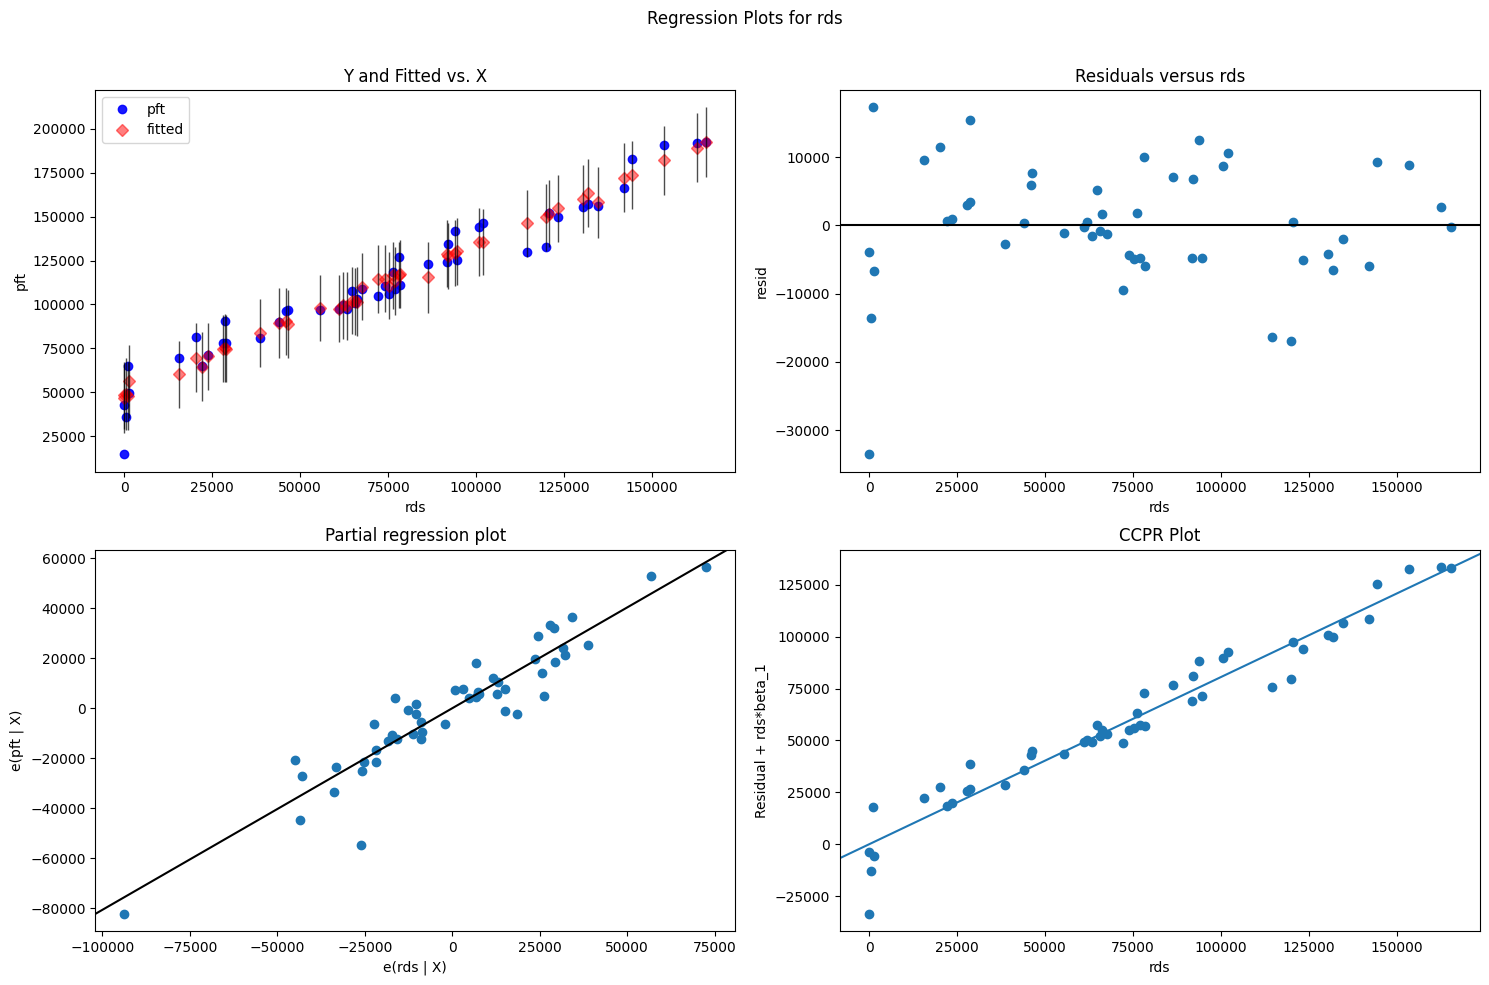

In [50]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'rds',fig=fig)
plt.show()

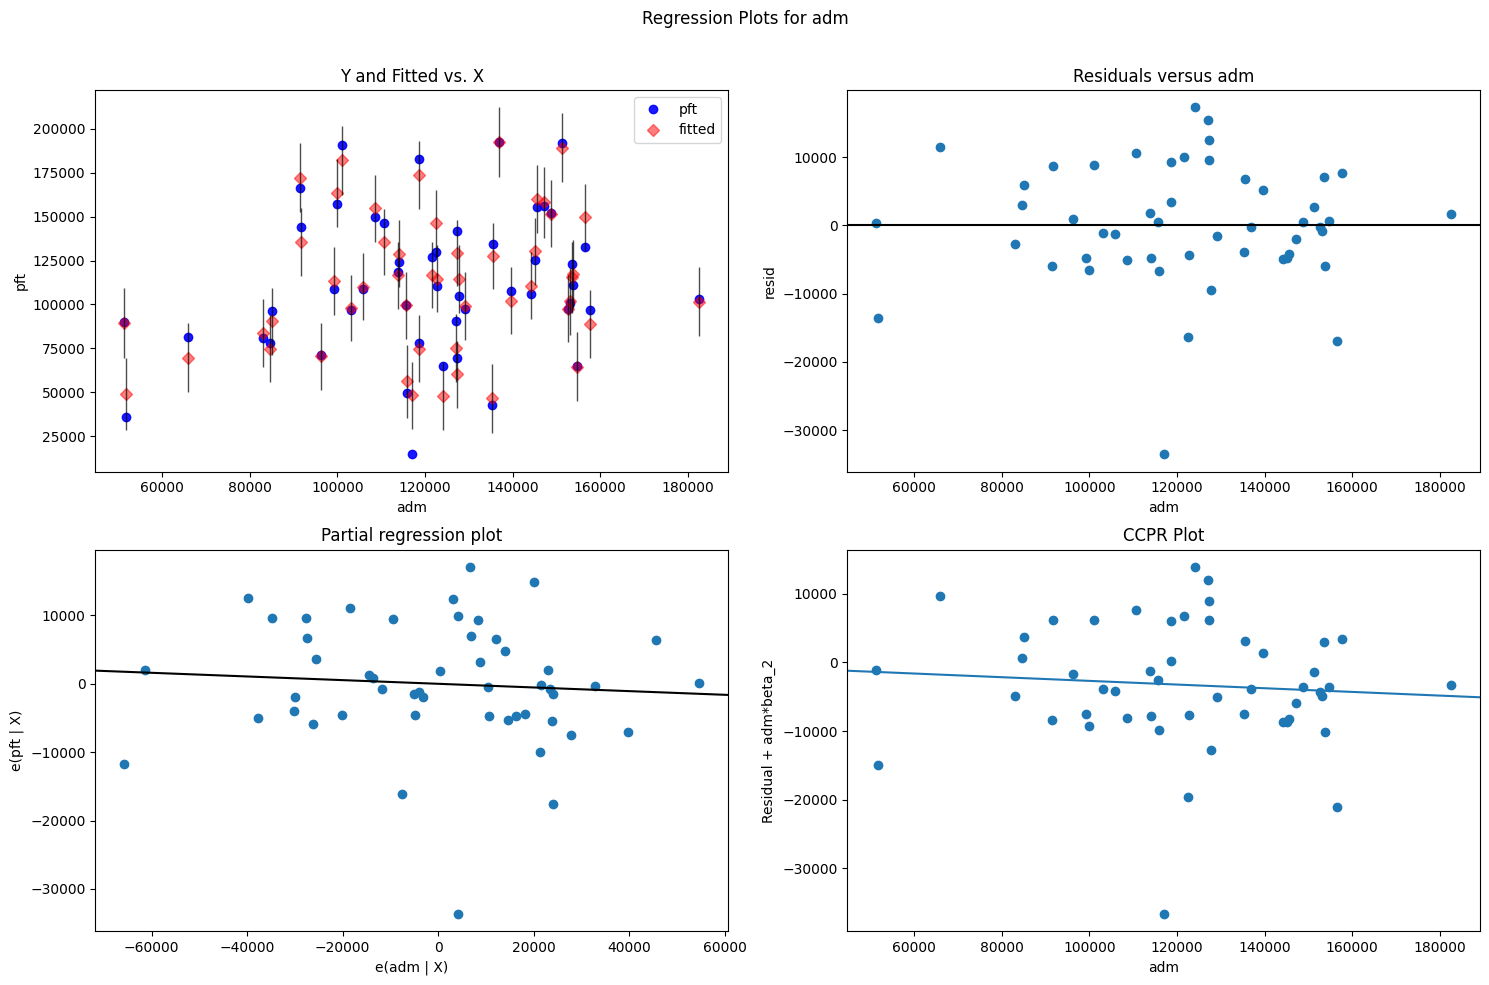

In [51]:
fig=plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'adm',fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook's distance

In [52]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence=model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

# inference
By examining the Cook's distances, we can identify observations that have a significant influence on the model. Observations with large Cook's distances indicate potential outliers or influential data points that may have a substantial impact on the regression results.

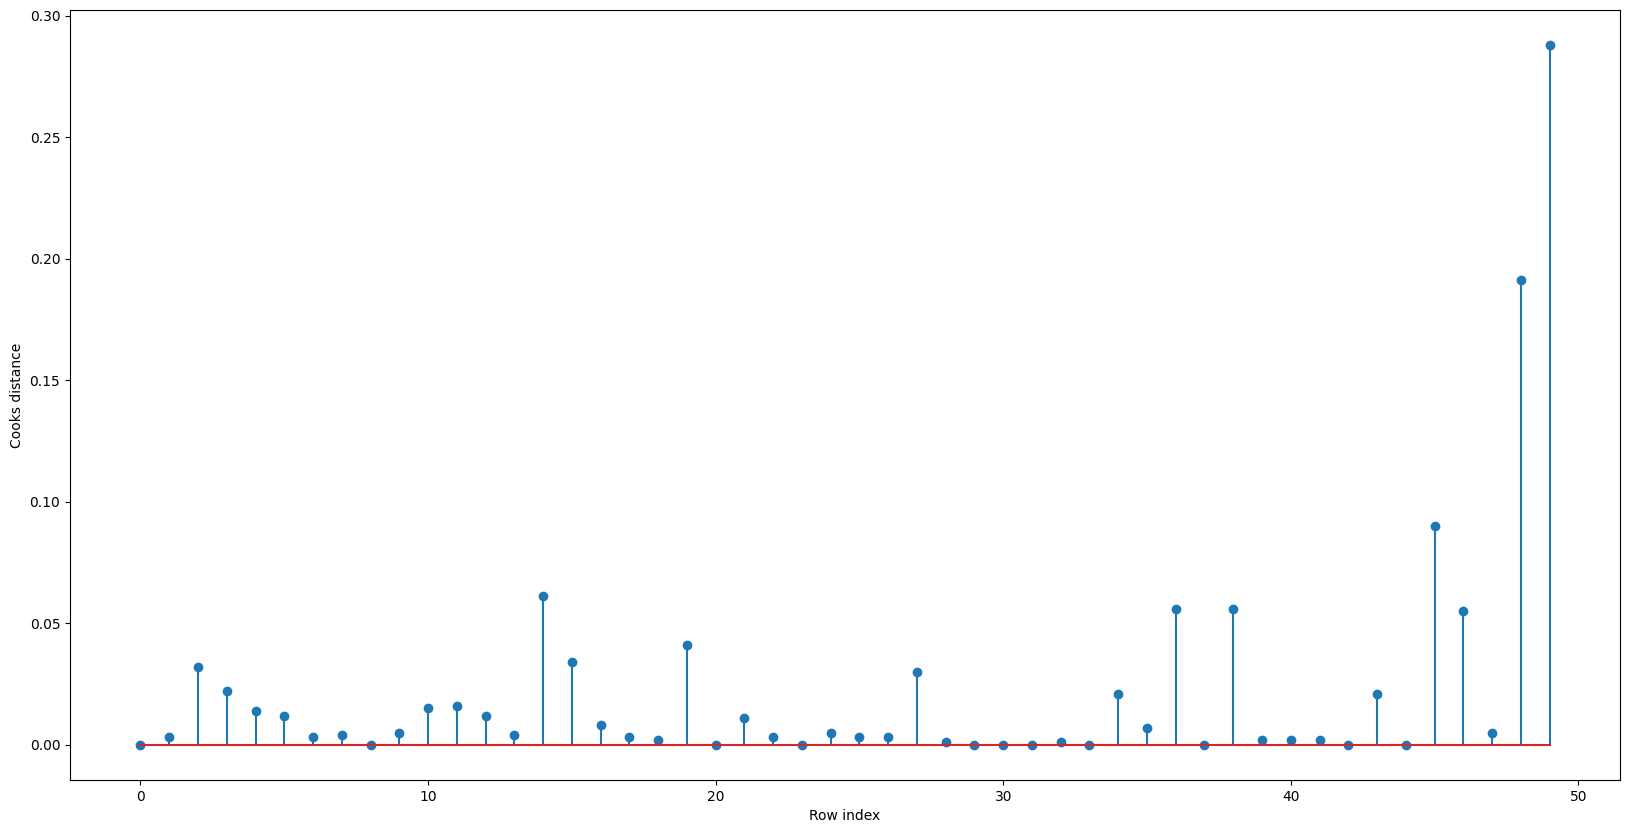

In [54]:
# now lets plot the values using stem plot for visualising influencers
fig = plt.figure(figsize=(20,10))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [55]:
# the cook's distance should be less than 0.5
# more than 0.5 shows high influencer/outline point and greater than 1 then its extreme
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

# inference
According to the output (49, 0.2880822927543263), the maximum value in the array c is approximately 0.2880822927543263, and it is located at index 49.

This information suggests that observation 49 in the dataset has the highest Cook's distance, indicating that it potentially has a significant influence on the regression model.

# High influence points

In [56]:
df.shape


(50, 4)

In [57]:
k = df.shape[1] # k= no. of variables
n = df.shape[0] # n= no. of datapoints
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.30000000000000004

In [58]:
# so here we can see that 0.3

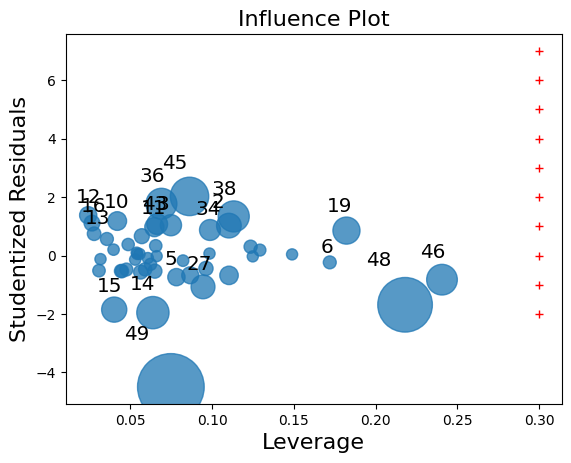

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model,alpha=0.5)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

plt.show()

In [60]:
# from leverage cutoff and cooks distance we can see that there is not any point which exceeds the leverage cutoff so there is not any influence points.

In [61]:
 model.rsquared,model.aic

(0.9507459940683246, 1058.7714985998055)

# inference
Model have an R-squared value of approximately 0.951. and there is not any influential points as per the leverage graph/influence plot so this is the final model as well.

# Model Prediction

In [62]:
new_df=pd.DataFrame({'rds':80000,"adm":90000,"ms":150000},index=[0])
new_df

,rds,adm,ms
0,80000,90000,150000


In [63]:
model.predict(new_df)

0    116250.169548
dtype: float64

# inference
The output (0   116250.169548 dtype: float64) suggests that the predicted value for the target variable, based on the "new_df", is approximately 116250.169548. The predicted value is a single value represented as a float64 data type.